# Hackathon: Cheat sheet

Scenario:

<img src="images/justice.png">

You are a group of interns working for "Justice for All," a non-profit organization in Los Angeles. Ellen, the director, has called upon you, the resident spatial data scientists, to produce a report based on a .geojson file that your manager Kazu has compiled. Kazu downloaded the data from Social Explorer, cleaned it up, and merged it with a geojson file. Kazu's wife went into labor last night (they are expecting a baby girl!) so it is now up to you to continue where Kazu left off. Ellen has a board meeting in an hour and wants you to produce a report for her in a Google Doc with the following material:

Part 1:
- A series of preliminary stats/charts of the data
- Maps: 
  - Make sure to zoom in to Los Angeles (crop Catalina Island out)
  - A series of choropleth maps
  - A series of side-by-side choropleth maps that show meaningful differences (make sure to make the legends, i.e. bin breaks the same on both maps)
  - Produce several maps that show two data layers: One basemap choropleth, and another overlay that shows the top values of another variable with red boundaries
  
Part 2:
- Import Council District boundaries from the LA Times
- Create a demographic profile for each Council District
   - hint: Do a spatial join to get census tracts that intersect with each council district
   - show only the census tracts for each council district
   - use a loop and/or function to minimize your code


## Import the geojson file (code cell provided)

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
gdf = gpd.read_file('data/acs2015_2019.geojson')

## Conduct a thorough exploration of the data, and answer the following questions:
   - what fields are included?
   - how many records and columns are there?
   - what does the data look like?
   - are the data types correct?

In [75]:
list(gdf)

['FIPS',
 'Total Population',
 'Population Density (Per Sq. Mile)',
 '% Total Population: Male',
 '% Total Population: Female',
 '% Total Population: Under 5 Years',
 '% Total Population: 5 to 9 Years',
 '% Total Population: 10 to 14 Years',
 '% Total Population: 15 to 17 Years',
 '% Total Population: 18 to 24 Years',
 '% Total Population: 25 to 34 Years',
 '% Total Population: 35 to 44 Years',
 '% Total Population: 45 to 54 Years',
 '% Total Population: 55 to 64 Years',
 '% Total Population: 65 to 74 Years',
 '% Total Population: 75 to 84 Years',
 '% Total Population: 85 Years and Over',
 '% Total Population: White Alone',
 '% Total Population: Black or African American Alone',
 '% Total Population: American Indian and Alaska Native Alone',
 '% Total Population: Asian Alone',
 '% Total Population: Native Hawaiian and Other Pacific Islander Alone',
 '% Total Population: Some Other Race Alone',
 '% Total Population: Two or More Races',
 '% Total Population: Not Hispanic or Latino',
 '% 

In [76]:
gdf.shape

(2346, 97)

In [77]:
gdf.head()

FIPS  Total Population  Population Density (Per Sq. Mile)  \
0  06037101110              4283                           9710.180   
1  06037101122              3405                           3335.385   
2  06037101210              6347                          25263.420   
3  06037101220              3702                          13719.170   
4  06037101300              3884                           3897.202   

   % Total Population: Male  % Total Population: Female  \
0                     47.63                       52.37   
1                     47.75                       52.25   
2                     52.78                       47.22   
3                     46.38                       53.62   
4                     48.84                       51.16   

   % Total Population: Under 5 Years  % Total Population: 5 to 9 Years  \
0                               6.61                              6.05   
1                               2.29                              3.08   
2                               6.65                              7.52   
3                               3.73                              4.38   
4                               2.29                              5.51   

   % Total Population: 10 to 14 Years  % Total Population: 15 to 17 Years  \
0                                4.67                                3.08   
1                                6.87                                0.35   
2                                6.03                                3.12   
3                                8.35                                3.84   
4                                2.39                                1.11   

   % Total Population: 18 to 24 Years  ...  \
0                                6.79  ...   
1                                8.49  ...   
2                               10.26  ...   
3                                8.24  ...   
4                                4.69  ...   

   % Workers 16 Years and Over: Did Not Work At Home: Less than 10 Minutes  \
0                                               4.24                         
1                                               0.49                         
2                                               9.16                         
3                                               3.64                         
4                                               3.20                         

   % Workers 16 Years and Over: Did Not Work At Home: 10 to 19 Minutes  \
0                                               9.72                     
1                                               3.05                     
2                                              19.20                     
3                                              23.35                     
4                                              14.14                     

   % Workers 16 Years and Over: Did Not Work At Home: 20 to 29 Minutes  \
0                                              29.21                     
1                                              15.87                     
2                                              19.33                     
3                                              17.20                     
4                                              21.49                     

   % Workers 16 Years and Over: Did Not Work At Home: 30 to 39 Minutes  \
0                                              21.90                     
1                                              24.15                     
2                                              24.17                     
3                                              23.60                     
4                                              18.52                     

   % Workers 16 Years and Over: Did Not Work At Home: 40 to 59 Minutes  \
0                                              17.12                     
1                                              34.79                     
2                

In [78]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 97 columns):
 #   Column                                                                                        Non-Null Count  Dtype   
---  ------                                                                                        --------------  -----   
 0   FIPS                                                                                          2346 non-null   object  
 1   Total Population                                                                              2346 non-null   int64   
 2   Population Density (Per Sq. Mile)                                                             2343 non-null   float64 
 3   % Total Population: Male                                                                      2327 non-null   float64 
 4   % Total Population: Female                                                                    2327 non-null   float64 
 5   % Total Popu

## Conduct preliminary statistical analysis on select fields of interest
   - what are the means/medians of your variables of interest?
   - what are the top 10 values of each?

In [ ]:
indicators = ['% Population 25 Years and Over: Less than High School',
 '% Population 25 Years and Over: High School Graduate (Includes Equivalency)',
 '% Population 25 Years and Over: Some College',
 "% Population 25 Years and Over: Bachelor's Degree",
 "% Population 25 Years and Over: Master's Degree",
 '% Population 25 Years and Over: Professional School Degree',
 '% Population 25 Years and Over: Doctorate Degree',]

In [81]:
for indicator in indicators:
    print ('mean for ' + indicator + ' is ' + str(gdf[indicator].mean()))

mean for % Total Population: Not Hispanic or Latino is 52.033197249677585
mean for % Total Population: Not Hispanic or Latino: White Alone is 26.937533304684166
mean for % Total Population: Not Hispanic or Latino: Black or African American Alone is 7.687082079931237
mean for % Total Population: Not Hispanic or Latino: American Indian and Alaska Native Alone is 0.2926085088096263
mean for % Total Population: Not Hispanic or Latino: Asian Alone is 14.258104856037802
mean for % Total Population: Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander Alone is 0.2373914911903739
mean for % Total Population: Not Hispanic or Latino: Some Other Race Alone is 0.3160464116888698
mean for % Total Population: Not Hispanic or Latino: Two or More Races is 2.304529437043403
mean for % Total Population: Hispanic or Latino is 47.96680704770101


In [95]:
for indicator in indicators:
    print(indicator)
    print (gdf.sort_values(by = indicator, ascending=False)[indicator].head(10))

% Total Population: Not Hispanic or Latino
2342    100.00
2331    100.00
1521    100.00
2314    100.00
327      99.02
2095     98.81
852      98.53
825      98.38
2094     98.18
874      98.08
Name: % Total Population: Not Hispanic or Latino, dtype: float64
% Total Population: Not Hispanic or Latino: White Alone
2162    91.95
839     90.39
2111    89.62
874     89.02
2044    88.96
825     88.75
844     88.06
832     87.77
312     87.52
837     86.92
Name: % Total Population: Not Hispanic or Latino: White Alone, dtype: float64
% Total Population: Not Hispanic or Latino: Black or African American Alone
1956    84.71
764     82.16
1953    81.77
1955    81.12
2150    80.89
1701    80.64
1950    79.57
1954    79.34
1947    78.10
748     78.06
Name: % Total Population: Not Hispanic or Latino: Black or African American Alone, dtype: float64
% Total Population: Not Hispanic or Latino: American Indian and Alaska Native Alone
2342    100.00
1521    100.00
1262      7.41
2229      5.41
1880      

## Create meaningful histograms

- use `plt.hist`
   
Challenge:
- add a vertical line for the mean and median
- change the size of the plot
- change the colors of the bins

In [96]:
def get_histogram(column = '% Population 25 Years and Over: Less than High School'):
    series_to_plot=gdf[column]

    plt.figure(figsize=(10,5))

    plt.hist(series_to_plot,bins=50,color='skyblue')

    plt.axvline(series_to_plot.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(series_to_plot.median(), color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(series_to_plot.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(series_to_plot.mean()))
    plt.text(series_to_plot.median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(series_to_plot.median()),color='r')
    plt.title(column + ' in Los Angeles County')


In [98]:
indicators = [ '% Population 25 Years and Over: Less than High School',
 '% Population 25 Years and Over: High School Graduate (Includes Equivalency)',
 '% Population 25 Years and Over: Some College',
 "% Population 25 Years and Over: Bachelor's Degree",
 "% Population 25 Years and Over: Master's Degree",
 '% Population 25 Years and Over: Professional School Degree',
 '% Population 25 Years and Over: Doctorate Degree',]

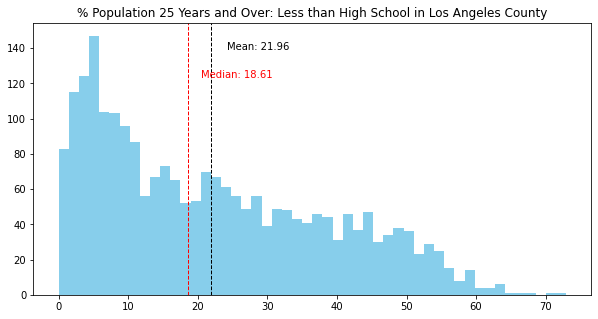

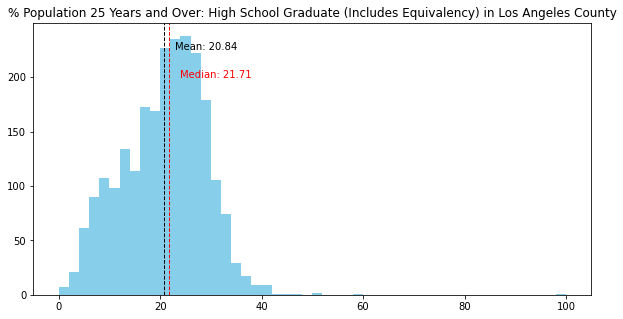

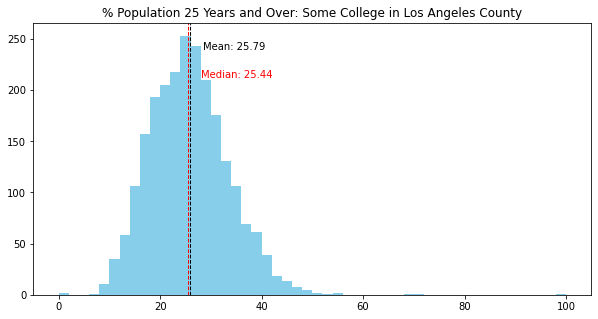

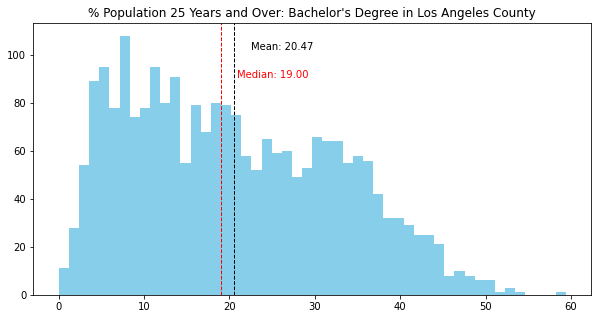

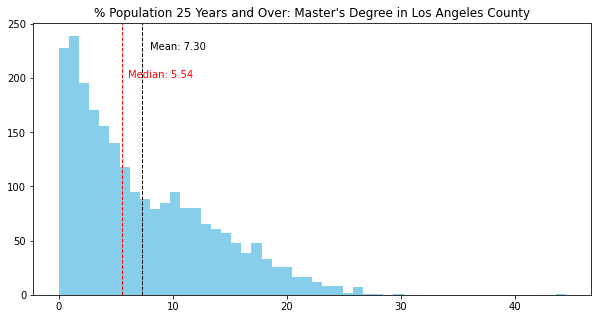

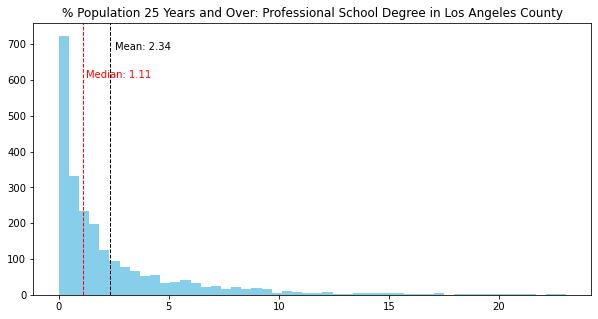

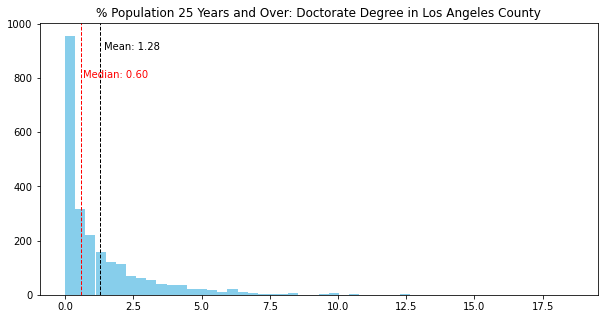

In [99]:
for indicator in indicators:
    get_histogram(column=indicator)

# Maps

## Create a single choropleth map with a variable of your choice 

- Make it big
- Zoom in (don't show Catalina Island)

In [113]:
def get_map(column='% Population 25 Years and Over: Doctorate Degree'):
    ax = gdf.plot(figsize=(10,10),
                  column=column,
                  legend=True)
    ax.set_ylim(33.6,34.9)
    ax.set_title(column, fontsize=14)
    ax.axis('off');

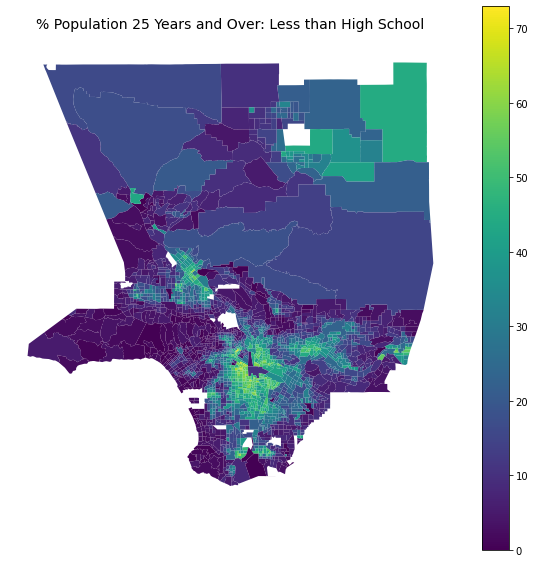

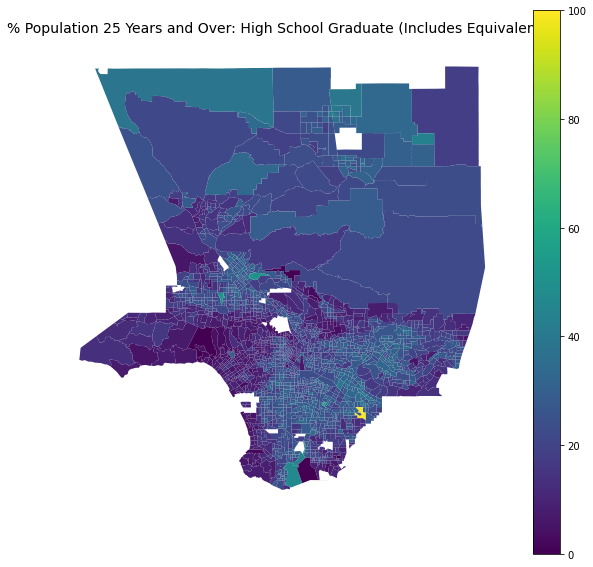

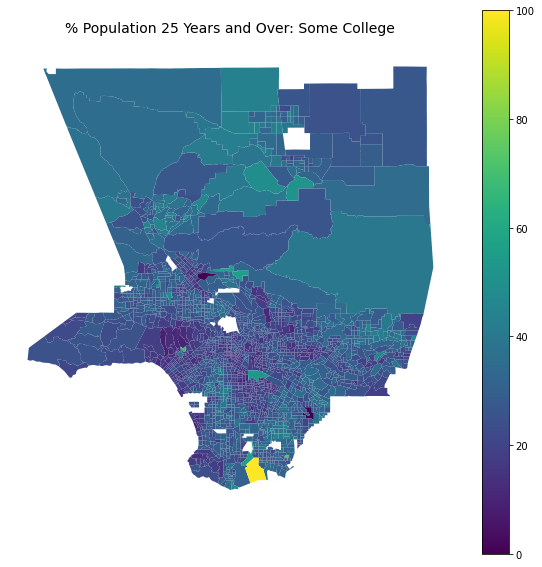

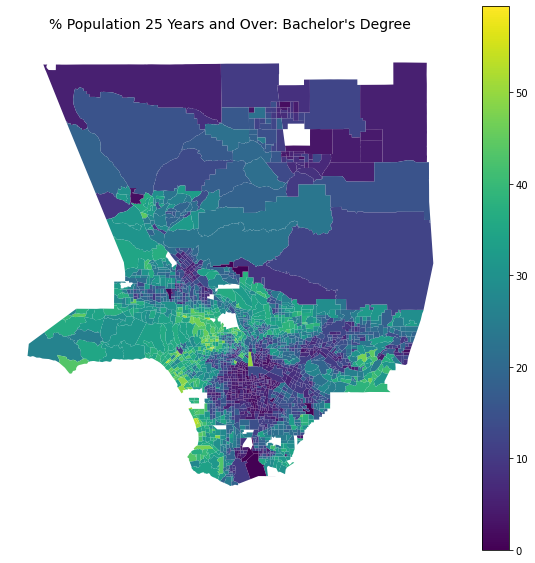

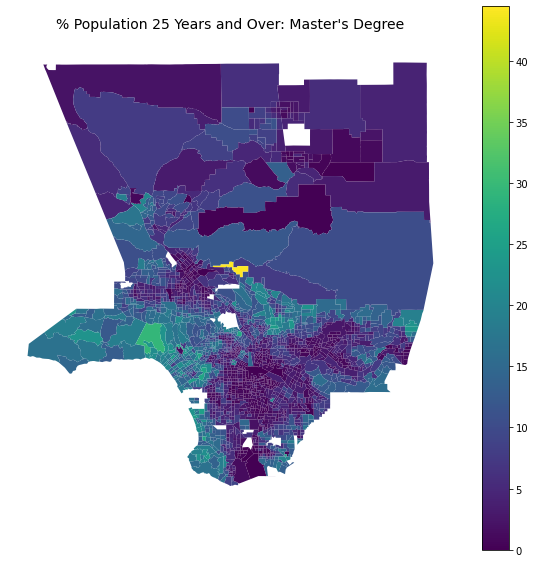

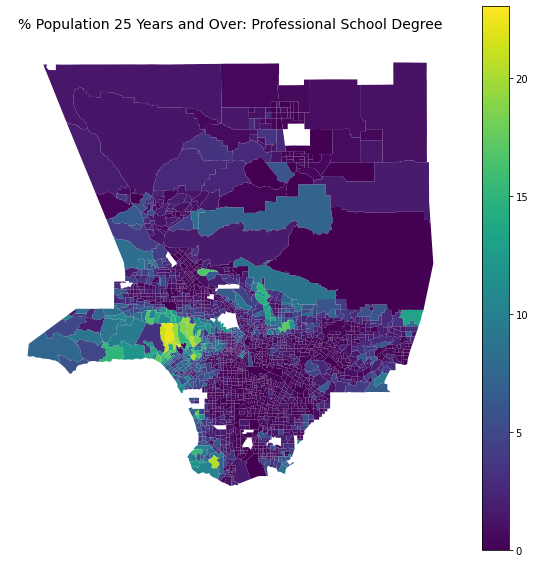

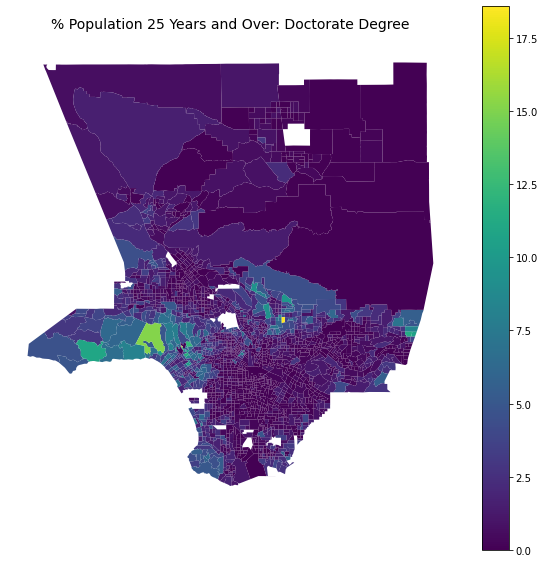

In [114]:
for indicator in indicators:
    get_map(indicator)

## Create a side-by-side map

- Zoom in (sorry Catalina)
- Make the breakdowns the same between both maps

Example arguments to make custom breakdowns
```python
gdf.plot(ax=ax[0],
         column='% Total Population: White Alone',
         legend=True,
         scheme='user_defined', 
         classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )
```

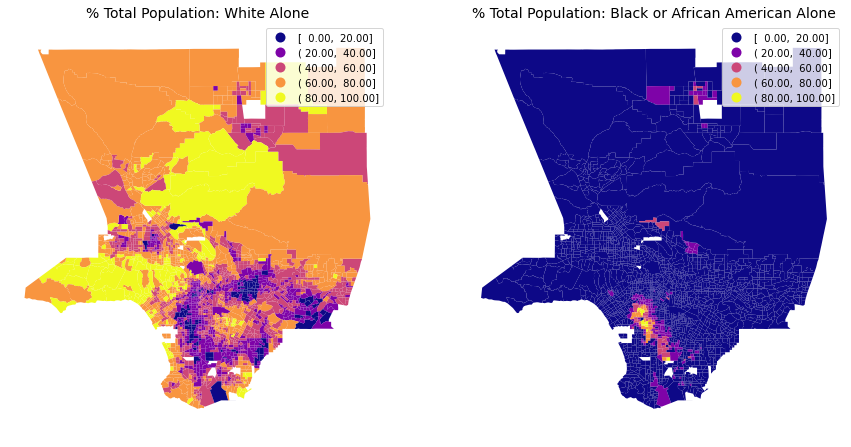

In [120]:
column1 = '% Total Population: White Alone'
column2 = '% Total Population: Black or African American Alone'
fig,ax = plt.subplots(1,2,figsize=(15,8))

gdf.plot(ax=ax[0],
         column=column1,
         legend=True,
         scheme='user_defined', 
         classification_kwds={'bins':[20,40,60,80,100]},
         cmap='plasma'
        )

ax[0].set_ylim(33.6,34.9)
ax[0].set_title(column1, fontsize=14)
ax[0].axis('off');

gdf.plot(ax=ax[1],
         column=column2,
         legend=True,
         scheme='user_defined', 
         classification_kwds={'bins':[20,40,60,80,100]},
         cmap='plasma'
        )

ax[1].set_ylim(33.6,34.9)
ax[1].set_title(column2, fontsize=14)
ax[1].axis('off');



## Create a single map with two layers

- Make one variable the "base" choropleth map
- Overlay another variable, only showing the boundary outlines that match a particular query
- Make sure the map tells a story

Sample arguments to make your second overlay:

```python
    alpha=1,
    linewidth=1,
    hatch="////",
    facecolor="none", 
    color='red'
```

In [121]:
gdf['% Population 15 Years and Over: Divorced'].describe()

count    2327.000000
mean        8.222398
std         3.769982
min         0.000000
25%         5.920000
50%         7.770000
75%        10.080000
max       100.000000
Name: % Population 15 Years and Over: Divorced, dtype: float64

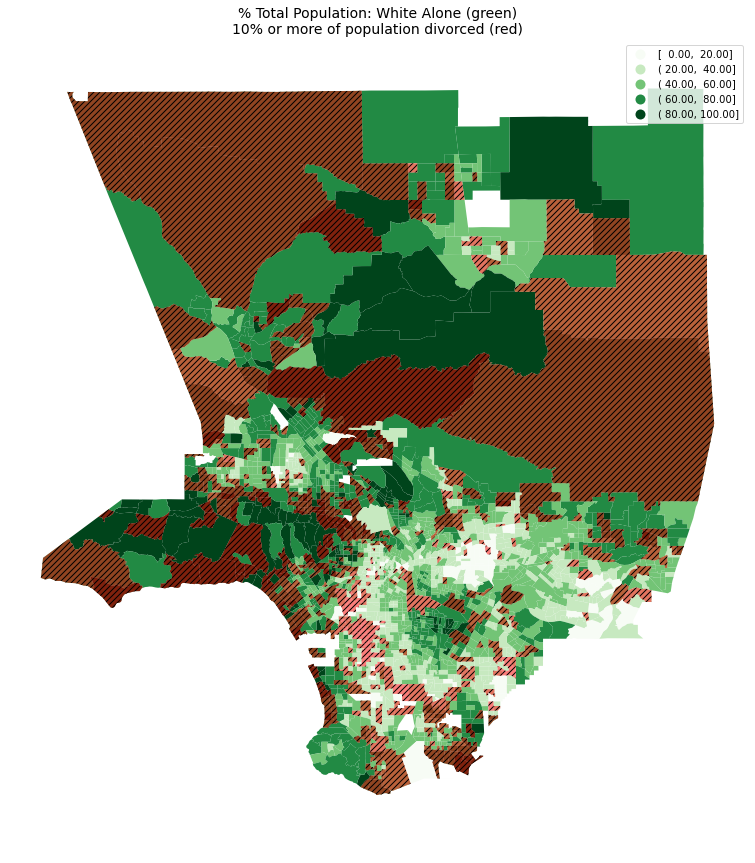

In [133]:
column1 = '% Total Population: White Alone'
column2 = '% Population 15 Years and Over: Divorced'
fig,ax = plt.subplots(figsize=(15,15))

gdf.plot(ax=ax,
         column=column1,
         legend=True,
         scheme='user_defined', 
         classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )

gdf[gdf['% Population 15 Years and Over: Divorced'] >= 10].plot(ax=ax,
        alpha=.5,
        linewidth=1,
        hatch="////",
        facecolor="none", 
        color='red'
        )

ax.set_ylim(33.6,34.9)
ax.set_title(column1 + ' (green)\n' + '10% or more of population divorced (red)', fontsize=14)
ax.axis('off');



## Part 2: Council District Maps

In [3]:
# Council Districts
gdf_cd = gpd.read_file('http://boundaries.latimes.com/1.0/boundary-set/la-city-council-districts-2012/?format=geojson')

## Do a spatial join to get the census tracts inside of CD1

In [4]:
gdf_cd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   kind          15 non-null     object  
 1   external_id   15 non-null     object  
 2   name          15 non-null     object  
 3   slug          15 non-null     object  
 4   set           15 non-null     object  
 5   metadata      15 non-null     object  
 6   resource_uri  15 non-null     object  
 7   geometry      15 non-null     geometry
dtypes: geometry(1), object(7)
memory usage: 1.1+ KB


In [71]:
# function to create a council district map
def cd_map(name = '1', column = '% Total Population: Hispanic or Latino'):
    # this cd
    this_cd = gdf_cd[gdf_cd['name']==name]
    
    # spatial join to get tracts
    tracts = gpd.sjoin(gdf,this_cd)

    # plot it
    fig,ax = plt.subplots()

    # map
    tracts.plot(ax=ax,
                column=column, 
                vmin=0,
                vmax=100,
                legend=True)

    ax.axis('off')
    ax.set_title('Council District ' + name + '\n(' + column + ')', fontsize=14)

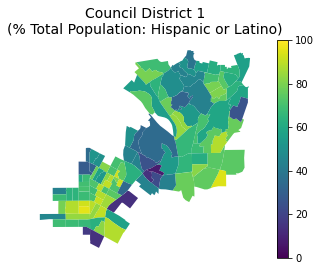

In [72]:
cd_map()

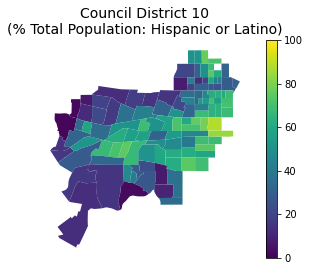

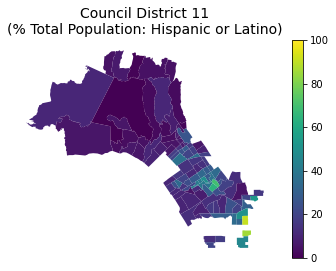

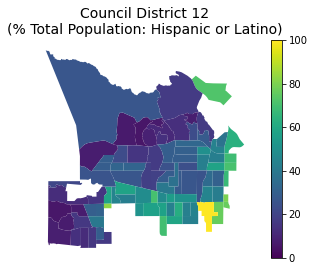

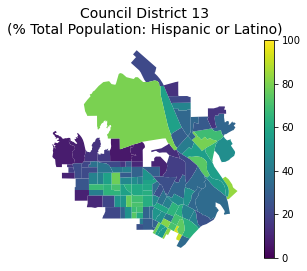

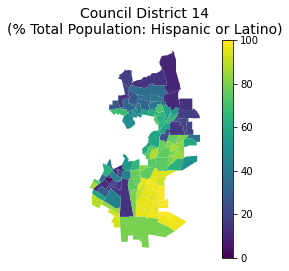

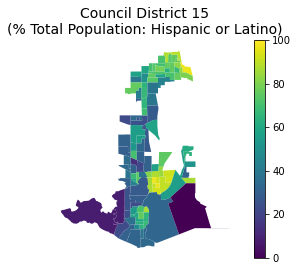

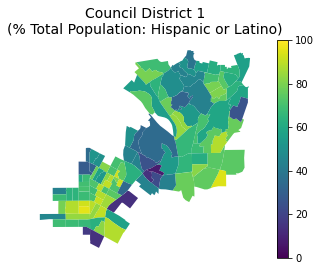

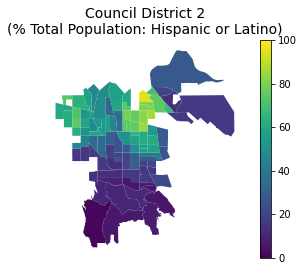

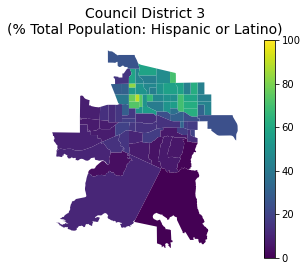

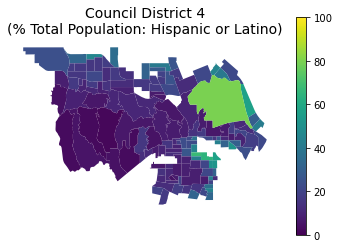

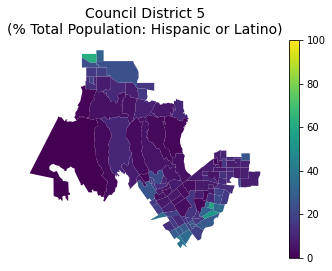

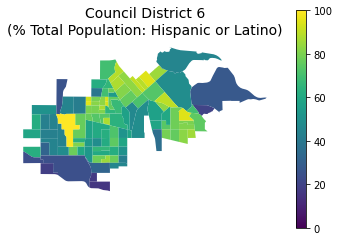

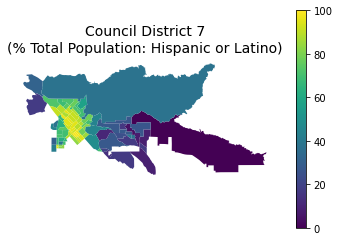

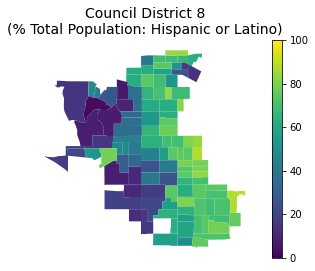

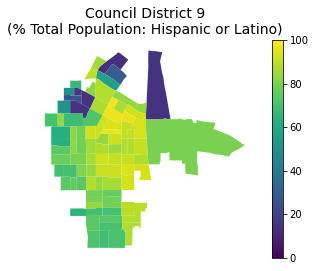

In [73]:
for index, row in gdf_cd.iterrows():
    cd_map(name = row['name'])

In [42]:
list(gdf)

['FIPS',
 'Total Population',
 'Population Density (Per Sq. Mile)',
 '% Total Population: Male',
 '% Total Population: Female',
 '% Total Population: Under 5 Years',
 '% Total Population: 5 to 9 Years',
 '% Total Population: 10 to 14 Years',
 '% Total Population: 15 to 17 Years',
 '% Total Population: 18 to 24 Years',
 '% Total Population: 25 to 34 Years',
 '% Total Population: 35 to 44 Years',
 '% Total Population: 45 to 54 Years',
 '% Total Population: 55 to 64 Years',
 '% Total Population: 65 to 74 Years',
 '% Total Population: 75 to 84 Years',
 '% Total Population: 85 Years and Over',
 '% Total Population: White Alone',
 '% Total Population: Black or African American Alone',
 '% Total Population: American Indian and Alaska Native Alone',
 '% Total Population: Asian Alone',
 '% Total Population: Native Hawaiian and Other Pacific Islander Alone',
 '% Total Population: Some Other Race Alone',
 '% Total Population: Two or More Races',
 '% Total Population: Not Hispanic or Latino',
 '% 

In [47]:
indicators = [ '% Total Population: Not Hispanic or Latino',
 '% Total Population: Not Hispanic or Latino: White Alone',
 '% Total Population: Not Hispanic or Latino: Black or African American Alone',
 '% Total Population: Not Hispanic or Latino: American Indian and Alaska Native Alone',
 '% Total Population: Not Hispanic or Latino: Asian Alone',
 '% Total Population: Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander Alone',
 '% Total Population: Not Hispanic or Latino: Some Other Race Alone',
 '% Total Population: Not Hispanic or Latino: Two or More Races',
 '% Total Population: Hispanic or Latino']

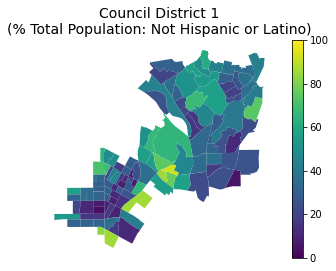

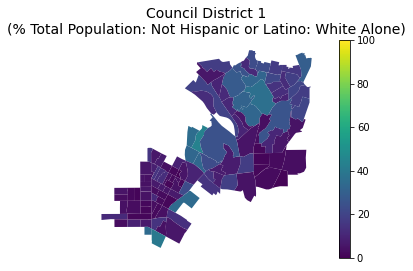

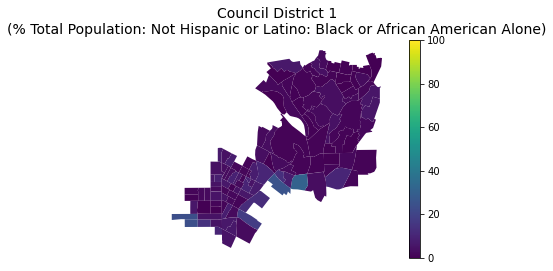

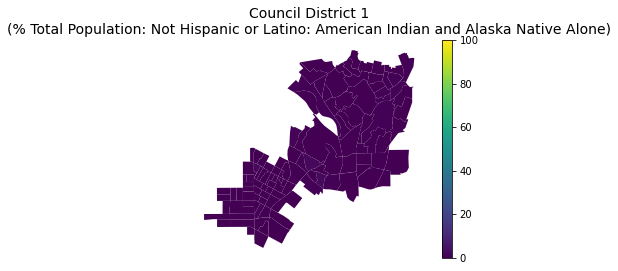

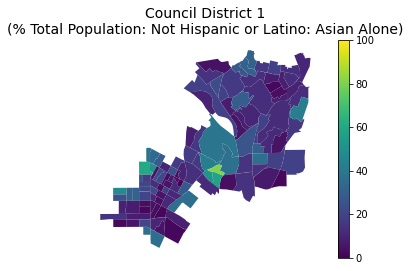

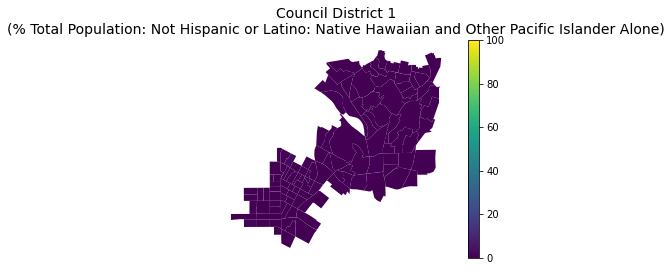

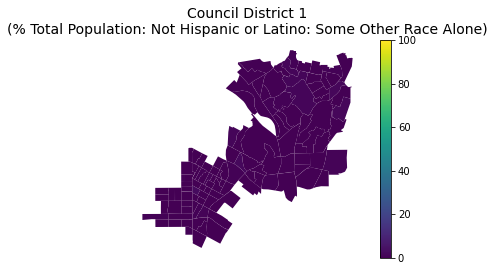

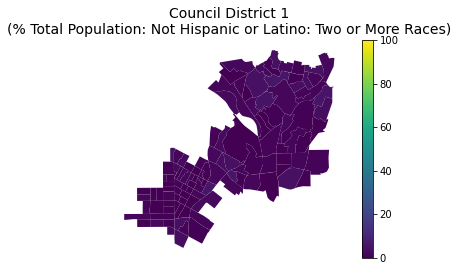

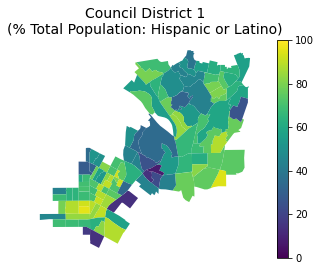

In [74]:
for indicator in indicators:
    cd_map(name='1',column=indicator)